In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression 
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [10]:
import datetime as dt 
start_time = dt.datetime.now()
print('Investigation started at: {}'.format(start_time))

Investigation started at: 2024-01-03 15:49:41.368229


In [11]:
df_cust = pd.read_csv("data/kunden.csv", sep=";")
df_vis = pd.read_csv("data/besucher copy.csv", sep=";", decimal='.')
df_geo = pd.read_csv("data/geo_test.csv", delimiter=";")

<font size = "20">Elektrauto AG</font>

<i> HWR Berlin, Wintersemester 2023-2024</i>

<i> Sarah Leta, Noah Bonekamp, Elian Bartsch</i>

In [13]:
df_geo['Niederlassung']= df_geo['Niederlassung'].astype(str)
df_geo['Niederlassung'] = df_geo['Niederlassung'].str.title()
#Data Cleaning um nur noch die Bundesländer zu zeigen
mapping = {
    'Berlin-Mitte': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Nrw': 'Nordrhein-Westfalen',
    'Düsseldorf': 'Nordrhein-Westfalen'
}
df_geo['Niederlassung'] = df_geo['Niederlassung'].replace(mapping, regex=True)

In [14]:
#zusammenführen der geodaten
cust_m = pd.merge(df_cust, df_geo, how='left', on='KundeNr')
vis_m = pd.merge(df_vis, df_geo, how='left', on='KundeNr')
cust_m_copy = cust_m.copy()

In [15]:
uniques = list(df_geo['Niederlassung'].unique())
print(uniques)
n_unique = df_geo['Niederlassung'].nunique()
print(f'Wir haben Kunden aus {n_unique} Bundesländern')
#Kunden sind aus 10 Bundesländern vertreten 

['Sachsen', 'Nordrhein-Westfalen', 'Hessen', 'Bayern', 'Baden-Württemberg', 'Berlin', 'Niedersachsen', 'Brandenburg', 'Thüringen', 'Hamburg']
Wir haben Kunden aus 10 Bundesländern


In [16]:
#index setzen auf die Kundennummer
cust_m.set_index('KundeNr', inplace=True)
vis_m.set_index('KundeNr', inplace=True)

In [17]:
cust_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, K0310 to K0861
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alter          1104 non-null   int64  
 1   Einkommen      1104 non-null   object 
 2   Preis          1104 non-null   float64
 3   Geschlecht     1099 non-null   float64
 4   Zeit           1104 non-null   float64
 5   Niederlassung  1104 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 60.4+ KB


In [18]:
cust_m.head(5)

,Alter,Einkommen,Preis,Geschlecht,Zeit,Niederlassung
KundeNr,,,,,,
K0310,64,66894.0,88160.31,1.0,43.0,Bayern
K1042,54,77644.0,103145.70,1.0,40.0,Berlin
K0382,55,44341.0,80565.16,0.0,37.0,Baden-Württemberg
K0498,49,67271.0,83949.89,0.0,42.0,Bayern
K0552,46,49832.0,93781.58,0.0,41.0,Hessen


In [19]:
cust_m.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,1104.0,50.481884,12.225059,30.00,40.0000,51.000,61.000,120.00
Preis,1104.0,88975.198714,24464.067781,21471.65,70609.4225,88931.455,107093.375,165482.31
Geschlecht,1099.0,0.637853,0.480840,0.00,0.0000,1.000,1.000,1.00
Zeit,1104.0,44.375906,10.848040,12.00,37.0000,44.000,52.000,80.00


In [20]:
vis_m.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,891.0,49.881033,11.865889,30.00,40.00,49.00,60.00,70.00
Einkommen,891.0,59367.936061,16164.358281,10802.03,47816.61,59163.82,71001.38,108569.09
Geschlecht,891.0,0.578002,0.494156,0.00,0.00,1.00,1.00,1.00
Zeit,891.0,35.166105,10.476802,3.00,28.00,35.00,43.00,68.00


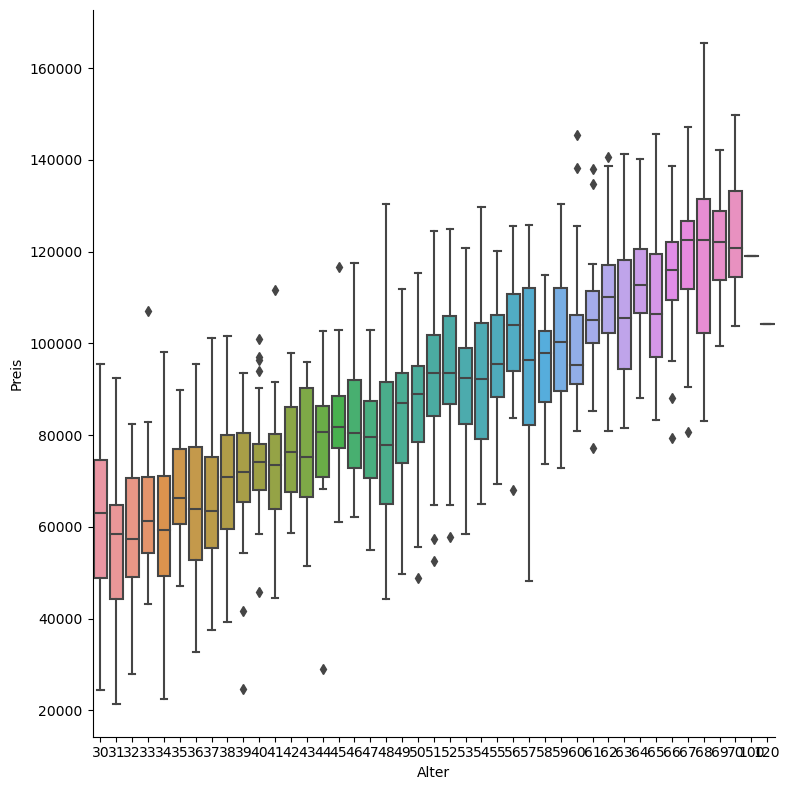

In [22]:
sns.catplot(x='Alter', y='Preis', data=cust_m, kind='box', height=8)

In [54]:
import pandas as pd

# Assuming 'cust_m' is your DataFrame

# Convert 'Einkommen' and 'Alter' columns to numeric
cust_m['Einkommen'] = pd.to_numeric(cust_m['Einkommen'], errors='coerce')
cust_m['Alter'] = pd.to_numeric(cust_m['Alter'], errors='coerce')

# Drop rows with NaN values (if any) after the conversion
cust_m = cust_m.dropna(subset=['Einkommen', 'Alter'])

# Outlier detection for 'Einkommen'
Q1 = cust_m['Einkommen'].quantile(0.25)
Q3 = cust_m['Einkommen'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cust_m = cust_m[(cust_m['Einkommen'] >= lower_bound) & (cust_m['Einkommen'] < upper_bound)]

# Outlier detection for 'Alter'
Q1_Alter = cust_m['Alter'].quantile(0.25)
Q3_Alter = cust_m['Alter'].quantile(0.75)
IQR_Alter = Q3_Alter - Q1_Alter

lower_bound_Alter = Q1_Alter - 1.5 * IQR_Alter
upper_bound_Alter = Q3_Alter + 1.5 * IQR_Alter

cust_m = cust_m[(cust_m['Alter'] >= lower_bound_Alter) & (cust_m['Alter'] < upper_bound_Alter)]
#this excludes 11 rows 

In [24]:
cust_m.head(5)

,Alter,Einkommen,Preis,Geschlecht,Zeit,Niederlassung
KundeNr,,,,,,
K0310,64,66894.0,88160.31,1.0,43.0,Bayern
K1042,54,77644.0,103145.70,1.0,40.0,Berlin
K0382,55,44341.0,80565.16,0.0,37.0,Baden-Württemberg
K0498,49,67271.0,83949.89,0.0,42.0,Bayern
K0552,46,49832.0,93781.58,0.0,41.0,Hessen


<font size = "8">Ergebnisse der Umfrage</font>

<font size = "8">1. Wie viele Autos wurden verkauft? Und was ist der Hoechst-, Mindest- und Durchschnittspreis der verkauften Autos? Wie hoch war der Gesamtumsatz?
</font> 

In [72]:
mean_v = cust_m['Preis'].mean()
max_v = cust_m['Preis'].max()
min_v = cust_m['Preis'].min()
Total = cust_m['Preis'].sum()
total_sold = cust_m_copy.index.nunique()

mean_values = round(mean_v, 2)
max_values = round(max_v, 2)
min_values = round(min_v,2)
total_value = round(Total, 2)

#Euro anzeigen lassen vor den Values
table = pd.DataFrame({
    'Anzahl verkaufter Fzg.': [total_sold],
    'Durchschnitt': ['{:,.2f} E'.format(mean_values)],
    'Maximaler Preis': ['{:,.2f} E'.format(max_values)],
    'Minimaler Preis': ['{:,.2f} E'.format(min_values)],
    'Gesamtumsatz': ['{:,.2f} E'.format(total_value)]
}, index=None)  
display(table)

,Anzahl verkaufter Fzg.,Durchschnitt,Maximaler Preis,Minimaler Preis,Gesamtumsatz
0,1104,"88,788.76 E","149,827.25 E","21,471.65 E","97,046,110.06 E"


<font size = "8">2. Wie viele Autos wurden pro Bundesland verkauft?</font>

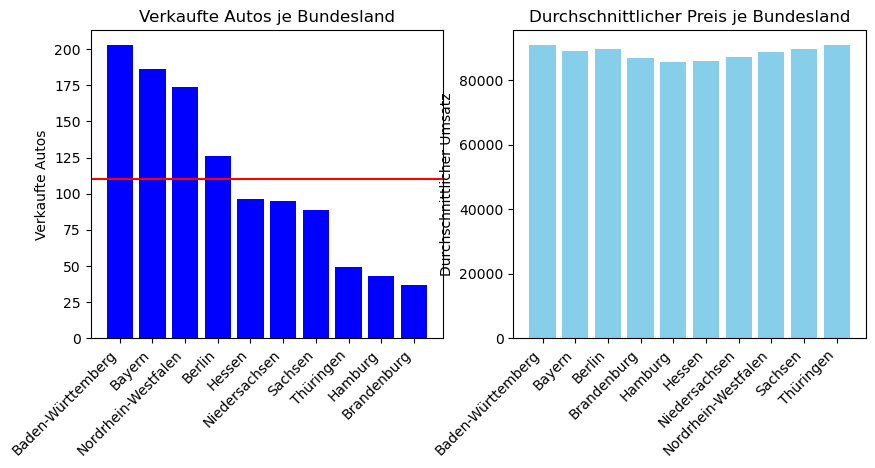

In [31]:
var = cust_m['Niederlassung'].value_counts()
mean_value = var.mean()

var2= cust_m.groupby('Niederlassung')['Preis'].agg('sum')

revenue = var2/var

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
ax1.bar(var.index, var.values, color='blue')
ax1.set_ylabel('Verkaufte Autos')
ax1.set_title('Verkaufte Autos je Bundesland')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.axhline(y=mean_value, color='red', linestyle='-')

ax2.bar(var2.index, revenue.values, color='skyblue')
ax2.set_ylabel('Durchschnittlicher Umsatz') 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Durchschnittlicher Preis je Bundesland')

plt.show()

In [32]:
var = cust_m['Niederlassung'].value_counts()
display(var)

Niederlassung
Baden-Württemberg      203
Bayern                 186
Nordrhein-Westfalen    174
Berlin                 126
Hessen                  96
Niedersachsen           95
Sachsen                 89
Thüringen               49
Hamburg                 43
Brandenburg             37
Name: count, dtype: int64

<h3>Gesamtprofit pro Bundesland</h3>

In [33]:
var2= cust_m.groupby('Niederlassung')['Preis'].agg('sum')
print(var2)

Niederlassung
Baden-Württemberg      18451708.14
Bayern                 16552456.61
Berlin                 11287707.99
Brandenburg             3206924.71
Hamburg                 3678628.46
Hessen                  8243033.23
Niedersachsen           8278995.69
Nordrhein-Westfalen    15423611.69
Sachsen                 7961502.18
Thüringen               4450032.71
Name: Preis, dtype: float64


<font size = "8">3. Haben mehr Frauen oder mehr Maenner unsere Autos gekauft?</font>

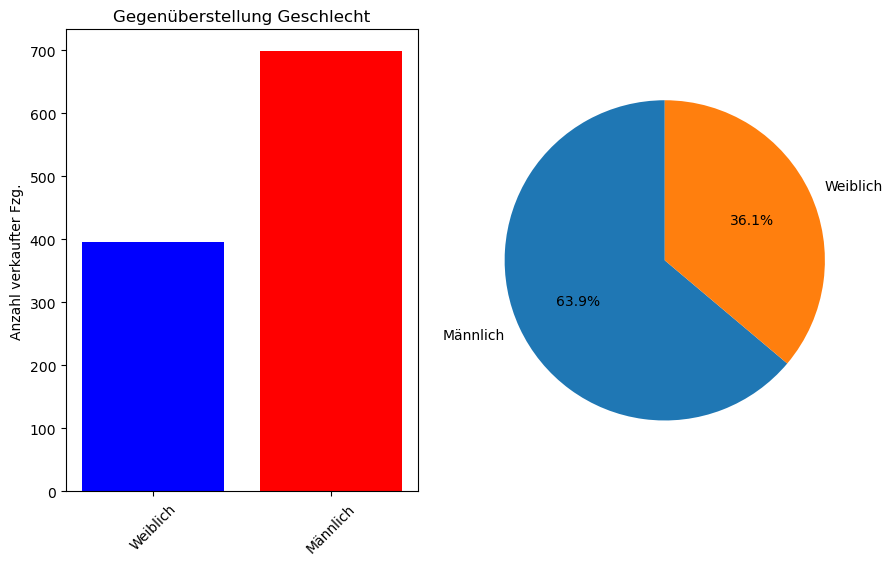

In [30]:

var = cust_m['Geschlecht'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.bar(var.index, var, color=['red', 'blue'])
ax1.set_ylabel('Anzahl verkaufter Fzg.')
ax1.set_title('Gegenüberstellung Geschlecht')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Weiblich', 'Männlich'], rotation=45)

labels = {1.0: 'Männlich', 0.0: 'Weiblich'}

var2 = cust_m['Geschlecht'].value_counts()
ax2.pie(var2, labels=labels.values(), autopct='%1.1f%%', startangle=90)
ax2.axis('equal')

plt.show()

<font size = "8">4. Durchschnittsalter unserer Kunden und Besucher und Durchschnittseinkommen unserer Kunden:</font>

In [57]:
mean_cust = cust_m['Alter'].mean()
mean_vis = vis_m['Alter'].mean()
age_cust_m_mean = cust_m.groupby('Geschlecht')['Alter'].mean()
mean_cust_Einkommen = cust_m['Einkommen'].mean()
cust_credit = cust_m[cust_m['Preis'] >= cust_m['Einkommen']].value_counts().sum()
cust_credit_p = cust_credit/1104
table = pd.DataFrame({
    'Durschnittliches Alter Kunden': [round(mean_cust, 2)], 
    'Durschnittliches Alter Visitors': [round(mean_vis, 2)], 
    'Durchschnittliches Alter maennlich (Kunden)': ['50.34'],
    'Durchschnittliches Alter weiblich (Kunden)': ['50.52'], 
    'Durchschnittliches Einkommen Kunden': ['{:,.2f}E'.format(mean_cust_Einkommen)], 
    'Anzahl Kunden mit Kreditaufnahme': [cust_credit], 
    '%-Verteilung Kredit': [cust_credit_p]
})
display(table.T)
    

,0
Durschnittliches Alter Kunden,50.29
Durschnittliches Alter Visitors,49.88
Durchschnittliches Alter maennlich (Kunden),50.34
Durchschnittliches Alter weiblich (Kunden),50.52
Durchschnittliches Einkommen Kunden,"58,780.32E"
Anzahl Kunden mit Kreditaufnahme,1088
%-Verteilung Kredit,0.985507


<font size = "8">5. Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit fuer unseren Kunden?</font>

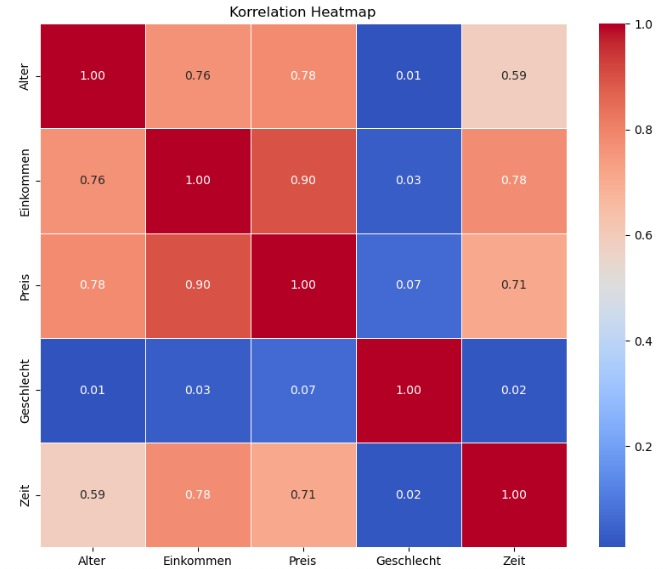

<font size = "8">6. Wie ist die Variable Zeit verteilt?</font>

Text(0, 0.5, 'Anzahl der Besichtigungen')

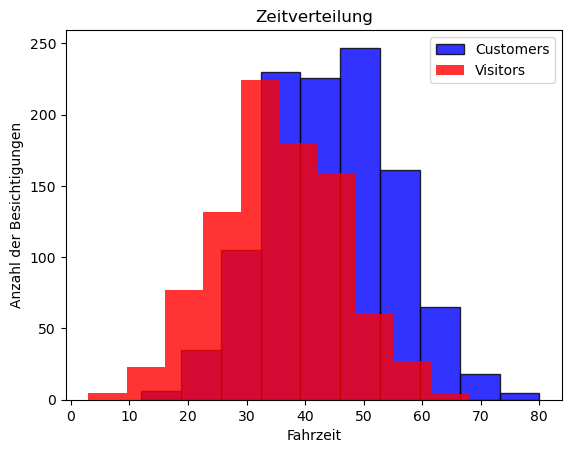

In [37]:
time = cust_m['Zeit'].value_counts()
time_asc = sorted(cust_m['Zeit'], reverse=True)
time_asc_vis = sorted(vis_m['Zeit'], reverse=True)
number_bins = 10
a = 0.8
plt.hist(time_asc, bins = number_bins, color = 'blue', edgecolor = 'black', alpha = a, label = 'Customers')
plt.hist(time_asc_vis, bins = number_bins, color = 'red', alpha = a, label = 'Visitors')
plt.legend()
plt.title('Zeitverteilung')
plt.xlabel('Fahrzeit')
plt.ylabel('Anzahl der Besichtigungen')

<font size = "6">7. Und welche Variable beeinflusst den Preis des Autos am meinsten?</font>

In [71]:
print("Groessten Einfluss haben  die Variablen in folgender Sequenz: 1. Einkommen , 2. Alter, 3. Zeit, 4. Geschlecht ")

Groessten Einfluss haben  die Variablen in folgender Sequenz: 1. Einkommen , 2. Alter, 3. Zeit, 4. Geschlecht 


<font size = "8">Zusammengefasst:</font>

<h3>Targetgruppe vorwiegend<br>
Maenner mittleren Alters mit einem durchschnittlichen Alter<br>
Einkommen von 60 k<br>
Conversion Rate liegt bei 55 Prozent<br>
Suedlichen Bundeslaender sind Spitzenreiter im Vertriebsvolumen und Umsatz<br>
Kreditrate liegt bei 99 Prozent</h3>

<font size = "8">Probleme bei der Zusammenfuehrung des Datensatzes</font>

<h3>Die Bundeslaender waren nicht eindeutig oder hatten eine falsche Formatierung. Darum haben wir mit einem Dicc. sie gleichgezogen.</h3>

In [13]:
df_geo['Niederlassung']= df_geo['Niederlassung'].astype(str)
df_geo['Niederlassung'] = df_geo['Niederlassung'].str.title()
#Data Cleaning um nur noch die Bundesländer zu zeigen
mapping = {
    'Berlin-Mitte': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Nrw': 'Nordrhein-Westfalen',
    'Düsseldorf': 'Nordrhein-Westfalen'
}
df_geo['Niederlassung'] = df_geo['Niederlassung'].replace(mapping, regex=True)

<h3>In dem Datensatz waren sehr grosse Datenpunkte fuer die Spalten Alter und Einkommen. Diese mussten wir entfernen.</h3>

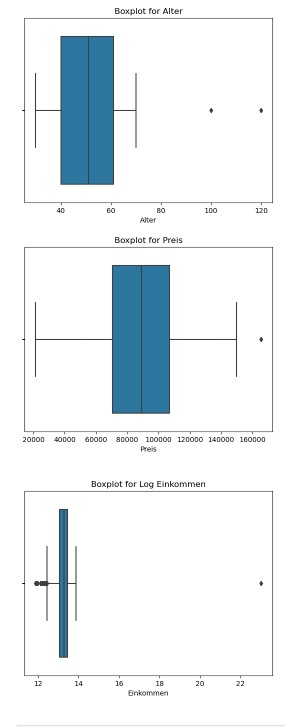

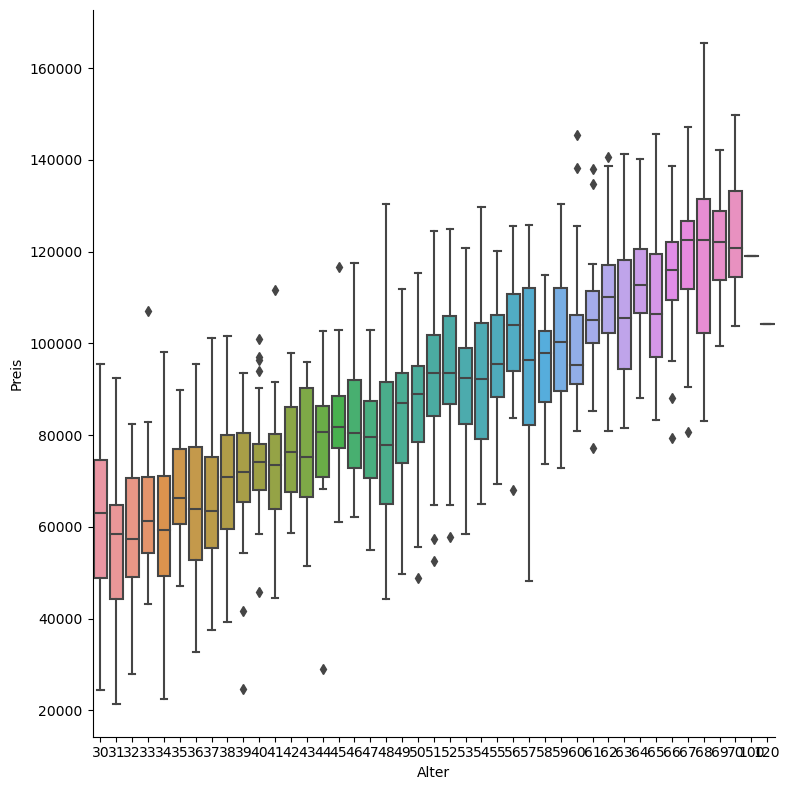

In [22]:
sns.catplot(x='Alter', y='Preis', data=cust_m, kind='box', height=8)

<h3>Um eine Verzerrung der Daten durch die grossen Datenpunkte zu vermeiden, haben wir die IQR benutzt, um diese aus dem Datensatz zu exkludieren.</h3>

In [54]:
import pandas as pd

# Assuming 'cust_m' is your DataFrame

# Convert 'Einkommen' and 'Alter' columns to numeric
cust_m['Einkommen'] = pd.to_numeric(cust_m['Einkommen'], errors='coerce')
cust_m['Alter'] = pd.to_numeric(cust_m['Alter'], errors='coerce')

# Drop rows with NaN values (if any) after the conversion
cust_m = cust_m.dropna(subset=['Einkommen', 'Alter'])

# Outlier detection for 'Einkommen'
Q1 = cust_m['Einkommen'].quantile(0.25)
Q3 = cust_m['Einkommen'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cust_m = cust_m[(cust_m['Einkommen'] >= lower_bound) & (cust_m['Einkommen'] < upper_bound)]

# Outlier detection for 'Alter'
Q1_Alter = cust_m['Alter'].quantile(0.25)
Q3_Alter = cust_m['Alter'].quantile(0.75)
IQR_Alter = Q3_Alter - Q1_Alter

lower_bound_Alter = Q1_Alter - 1.5 * IQR_Alter
upper_bound_Alter = Q3_Alter + 1.5 * IQR_Alter

cust_m = cust_m[(cust_m['Alter'] >= lower_bound_Alter) & (cust_m['Alter'] < upper_bound_Alter)]
#this excludes 11 rows 

<h3>Der Datensatz (Besucher[Einkommen]) enthielt eine Komma-Formatierung, welche wir offline geaendert haben.</h3>

<font size = "8">Prognosen vom Kaufpreis eines Autos</font>

In [61]:
cust_m.dropna(inplace=True)
cust_m['Kauf'] = 1
X = cust_m[['Alter', 'Geschlecht', 'Einkommen']]
y= cust_m['Preis']
model = LinearRegression()
x = model.fit(X, y)
kunde_1 = [[32, 1.0, 30000]]
prognose_1 = x.predict(kunde_1)
kunde_2 = [[51, 1.0, 54000]]
prognose_2 = x.predict(kunde_2)
print("Kunde 1: maennlicher  Kunde im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro.")
print("Kaufpreis Kunde 1:", prognose_1)

print("Kunde 2: maennlicher Kunde im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro.")
print("Kaufpreis Kunde 2:", prognose_2)

beta_price = model.coef_
print("Beta-Koeffizienten fuer Preisvorhersage:", beta_price)

Kunde 1: maennlicher  Kunde im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro.
Kaufpreis Kunde 1: [50324.14218393]
Kunde 2: maennlicher Kunde im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro.
Kaufpreis Kunde 2: [84813.9341628]
Beta-Koeffizienten fuer Preisvorhersage: [4.78444872e+02 2.06504030e+03 1.05830581e+00]


<h3>Kunde 1: maennlicher  Kunde im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro.<br>
Kaufpreis Kunde 1: [50324.14]<br>
Kunde 2: maennlicher Kunde im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro.<br>
Kaufpreis Kunde 2: [84813.93]<br>
Beta-Koeffizienten fuer Preisvorhersage: [4.78444872e+02 2.06504030e+03 1.05830581e+00]</h3>

<font size = "8">Wahrscheinlichkeit des Kaufs eines Autos</font>

<h3>Um die Prognose laufen zu lassen, mussten wir die beiden Datensaetze (Besucher und Kunden) zusammenfuehren (concatenation). 

Dazu mussten wir eine neue Spalte hinzufuegen, welche binaere Ergebnisse zeigt ob die Person Kunde wurde und damit das Auto gekauft hat.</h3>

In [39]:
complete_df = pd.concat([cust_m, vis_m], ignore_index=True)
complete_df['Kauf'] = np.where(complete_df['Preis'].isna(), 0, 1)
complete_df['Preis'] = complete_df['Preis'].fillna(0)
print(complete_df['Einkommen'].isna().sum())
complete_df.head(5)
complete_df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alter          1984 non-null   int64  
 1   Einkommen      1984 non-null   float64
 2   Preis          1984 non-null   float64
 3   Geschlecht     1984 non-null   float64
 4   Zeit           1984 non-null   float64
 5   Niederlassung  1984 non-null   object 
 6   Kauf           1984 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 100.9+ KB


In [62]:
X_purchase = complete_df[['Alter', 'Geschlecht', 'Einkommen', 'Zeit']]
y_purchase = complete_df['Kauf']
model_purchase = LogisticRegression()
model_purchase.fit(X_purchase, y_purchase)

# Beta-Koeffizienten für die Kaufvorhersage
beta_purchase = model_purchase.coef_
#print("Beta-Koeffizienten fuer Kaufvorhersage:", beta_purchase)

# Wahrscheinlichkeitsvorhersage für Kauf
kunde_1_purchase = [[32, 1.0, 30000, 45]]
probability_1 = model_purchase.predict_proba(kunde_1_purchase)[:, 1]
kunde_2_purchase = [[51, 1.0, 54000, 45]]
probability_2 = model_purchase.predict_proba(kunde_2_purchase)[:, 1]

#print("Kunde 1: ein 32-jaehriger maennlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat.")
#print("Wahrscheinlichkeit Kunde 1 kauft:", probability_1)
#print("Kunde 2: ein 51-jaehriger maennlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat.")
#print("Wahrscheinlichkeit Kunde 2 kauft:", probability_2)

Beta-Koeffizienten fuer Kaufvorhersage: [[-1.00597332e-02  4.98424972e-04 -3.94703287e-05  7.80769765e-02]]
Kunde 1: ein 32-jähriger maennlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat.
Wahrscheinlichkeit Kunde 1 kauft: [0.88147699]
Kunde 2: ein 51-jähriger maennlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat.
Wahrscheinlichkeit Kunde 2 kauft: [0.70434372]


<h3>Kunde 1: ein 32-jaehriger maennlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat.
Wahrscheinlichkeit Kunde 1 kauft: 54.6 Prozent</h3>

<h3>Kunde 2: ein 51-jaehriger maennlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat.
Wahrscheinlichkeit Kunde 2 kauft: 73.8 Prozent</h3>

In [43]:
new_data_cust_1 = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1.0], 'Zeit': [30]})
prediction = reg.predict(new_data_cust_1)
print(prediction*100)

new_data_cust_2 = pd.DataFrame({'Alter': [51], 'Einkommen':[54000], 'Geschlecht': [1.0], 'Zeit': [45]})
prediction_2 = reg.predict(new_data_cust_2)
print(prediction_2*100)

0    54.596122
dtype: float64
0    73.820666
dtype: float64


In [41]:
import statsmodels.formula.api as smf 
reg = smf.logit('Kauf ~ Alter + Einkommen + Geschlecht + Zeit', data = complete_df).fit()

Optimization terminated successfully.
         Current function value: 0.580665
         Iterations 6


In [42]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Kauf   No. Observations:                 1984
Model:                          Logit   Df Residuals:                     1979
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.1560
Time:                        16:51:32   Log-Likelihood:                -1152.0
converged:                       True   LL-Null:                       -1364.9
Covariance Type:            nonrobust   LLR p-value:                 7.675e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4148      0.264     -9.155      0.000      -2.932      -1.898
Alter          0.0180      0.007      2.616      0.009       0.005       0.031
Einkommen  -4.219e-05   5.45e-06     -7.742      0.000   -5.29e-05   -3.15e-05
Geschlecht     0.2429      0.103      2.357      0.018       0.041       0.445
Zeit           0.1016      0.006     17.419      0.000       0.090       0.113
==============================================================================
"""

<font size = "8">Fuer die naechste Umfrage</font>

<h3>Ist die Kreditrate wirklich so enorm oder wie kann die Sparsumme der Haushalte in die Regression integriert werden? <br>
Was wirkt sich am meisten auf die Unterschiede zwischen den Verkaufszahlen in den einzelnen Bundeslaendern aus?<br>
Was bewirkt den Umsprung von Besucher zu Kunde im Kontext gefahrene Zeit? <br>
Wie wuerden Neukunden auf eine Inhouse Finanzierung anspringen?<br> 
Was waren die Gruende fuer die Besucher, nicht Kunde zu werden?</h3>

In [44]:
Investigation_Ende = dt.datetime.now()
investigation_time = Investigation_Ende - start_time 
minutes = divmod(investigation_time.total_seconds(), 60)[0]
seconds = round(divmod(investigation_time.total_seconds(), 60)[1], 0)
total = str(int(minutes)) + '.' +  str(int(seconds))
print(f'EDA took {total} min. ')

EDA took 62.49 min. 


<center>
    <font size = "16">Vielen Dank fuer Ihre Aufmerksamkeit!</font>
</center>